In [49]:

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all
 
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score
 
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca

# pip install nltk
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks


In [50]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
 
# pip install wordcloud
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
 
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Reina_Chi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Reina_Chi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
# Load dataset
file_path = "review_byu_15000_dataframe.csv"  # Path ke file CSV yang berisi data ulasan aplikasi
app_reviews_df = pd.read_csv(file_path)



In [52]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,98a124df-3df7-4c26-940c-032ffcd2e484,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sering bermasalah, data dihidupkan...",3,17,1.61.0,2025-04-09 09:30:00,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-09 09:57:32,1.61.0
1,c2e27eee-027e-48be-9d67-d24f2ffc26ff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,assalamu'alaikum ulasan saya sangat sangat san...,1,21,1.61.0,2025-04-11 09:26:35,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-11 22:18:26,1.61.0
2,44b6bf8c-bb88-4f29-9bd3-98d649c1f0ba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,iklan pop up kuota yang di tampilkan sih bagus...,3,5,1.61.0,2025-04-10 07:29:54,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-10 10:36:28,1.61.0
3,4fa741b7-03fe-4fe8-b246-3e83e2d750b9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Dulu By.U cukup stabil, tapi sekarang sering l...",1,85,1.61.0,2025-03-30 06:24:47,"Hai kak Yin, Sebelumnya mohon maaf banget, ata...",2025-03-30 09:46:55,1.61.0
4,1afe8f1c-7b6c-463f-95d2-f5868d60355e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa berat dengan pengalaman saya membeli pa...,1,169,1.61.0,2025-03-22 12:35:48,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-03-22 22:14:22,1.61.0


In [53]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  12433 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          14500 non-null  object
 9   repliedAt             14500 non-null  object
 10  appVersion            12433 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [54]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [55]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()
 
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [56]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12000 non-null  object
 1   userName              12000 non-null  object
 2   userImage             12000 non-null  object
 3   content               12000 non-null  object
 4   score                 12000 non-null  int64 
 5   thumbsUpCount         12000 non-null  int64 
 6   reviewCreatedVersion  12000 non-null  object
 7   at                    12000 non-null  object
 8   replyContent          12000 non-null  object
 9   repliedAt             12000 non-null  object
 10  appVersion            12000 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [57]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text):
    try:
        return word_tokenize(text)
    except Exception as e:
        print(f"Error in tokenizingText: {e}")
        return []
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [58]:
slangwords = {"yg": "yang", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [59]:


# Pastikan stopwords untuk bahasa Indonesia telah diunduh
import nltk

    
# Ensure Indonesian stopwords are available
try:
    from nltk.corpus import stopwords
    stopwords.words('indonesian')
except LookupError:
    nltk.download('stopwords')

# Clean the text and store it in the 'text_clean' column
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Convert text to lowercase and store it in 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Replace slang words with standard words and store in 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Tokenize the text and store it in 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Remove stopwords and store the result in 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Combine tokens into sentences and store in 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [60]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,98a124df-3df7-4c26-940c-032ffcd2e484,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sering bermasalah, data dihidupkan...",3,17,1.61.0,2025-04-09 09:30:00,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-09 09:57:32,1.61.0,Aplikasinya sering bermasalah data dihidupkan ...,aplikasinya sering bermasalah data dihidupkan ...,aplikasinya sering bermasalah data dihidupkan ...,"[aplikasinya, sering, bermasalah, data, dihidu...","[aplikasinya, bermasalah, data, dihidupkan, ka...",aplikasinya bermasalah data dihidupkan kadang ...
1,c2e27eee-027e-48be-9d67-d24f2ffc26ff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,assalamu'alaikum ulasan saya sangat sangat san...,1,21,1.61.0,2025-04-11 09:26:35,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-11 22:18:26,1.61.0,assalamualaikum ulasan saya sangat sangat sang...,assalamualaikum ulasan saya sangat sangat sang...,assalamualaikum ulasan saya sangat sangat sang...,"[assalamualaikum, ulasan, saya, sangat, sangat...","[assalamualaikum, ulasan, nyaman, pas, enak, p...",assalamualaikum ulasan nyaman pas enak promo d...
2,44b6bf8c-bb88-4f29-9bd3-98d649c1f0ba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,iklan pop up kuota yang di tampilkan sih bagus...,3,5,1.61.0,2025-04-10 07:29:54,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-04-10 10:36:28,1.61.0,iklan pop up kuota yang di tampilkan sih bagus...,iklan pop up kuota yang di tampilkan sih bagus...,iklan pop up kuota yang di tampilkan sih bagus...,"[iklan, pop, up, kuota, yang, di, tampilkan, s...","[iklan, pop, kuota, tampilkan, bagusmemeberika...",iklan pop kuota tampilkan bagusmemeberikan inf...
3,4fa741b7-03fe-4fe8-b246-3e83e2d750b9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Dulu By.U cukup stabil, tapi sekarang sering l...",1,85,1.61.0,2025-03-30 06:24:47,"Hai kak Yin, Sebelumnya mohon maaf banget, ata...",2025-03-30 09:46:55,1.61.0,Dulu ByU cukup stabil tapi sekarang sering lag...,dulu byu cukup stabil tapi sekarang sering lag...,dulu byu cukup stabil tapi sekarang sering lag...,"[dulu, byu, cukup, stabil, tapi, sekarang, ser...","[byu, stabil, lag, main, game, online, aneh, b...",byu stabil lag main game online aneh banget di...
4,1afe8f1c-7b6c-463f-95d2-f5868d60355e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kecewa berat dengan pengalaman saya membeli pa...,1,169,1.61.0,2025-03-22 12:35:48,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-03-22 22:14:22,1.61.0,kecewa berat dengan pengalaman saya membeli pa...,kecewa berat dengan pengalaman saya membeli pa...,kecewa berat dengan pengalaman saya membeli pa...,"[kecewa, berat, dengan, pengalaman, saya, memb...","[kecewa, berat, pengalaman, membeli, paket, ku...",kecewa berat pengalaman membeli paket kuota su...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,48dc76db-7643-45d0-af96-b9772516e245,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangatlah bagus dan direkomendasikan tapi ada ...,4,0,1.50.0,2023-11-17 06:12:03,Hai Kak. Makasih banyak buat feedback-nya. Sem...,2023-11-17 07:14:19,1.50.0,sangatlah bagus dan direkomendasikan tapi ada ...,sangatlah bagus dan direkomendasikan tapi ada ...,sangatlah bagus dan direkomendasikan tapi ada ...,"[sangatlah, bagus, dan, direkomendasikan, tapi...","[bagus, direkomendasikan, kekurangannya, paket...",bagus direkomendasikan kekurangannya paketpake...
14996,ae3665f1-4994-4036-9875-9be0b4e5b399,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kembalikan fitur isi semaunya sama unlimited n...,3,0,559,2020-08-08 03:13:46,Hai Kak! Makasih untuk sarannya. Ditunggu prom...,2020-08-08 13:26:30,559,Kembalikan fitur isi semaunya sama

In [61]:
import csv
import requests
from io import StringIO
 
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [62]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
 
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
 
    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan
 
    return score, polarity
 # Mengembalikan skor sentimen dan polaritas teks

In [63]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    7960
positive    4040
Name: count, dtype: int64


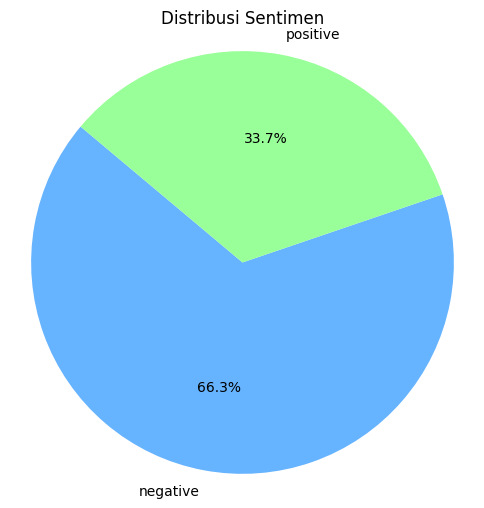

In [64]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing sentimen
sentiment_counts = clean_df['polarity'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Distribusi Sentimen')
plt.axis('equal')  # Supaya lingkarannya bulat sempurna
plt.show()

In [65]:
# Import pustaka yang dibutuhkan
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Misal kamu sudah punya clean_df sebelumnya
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
print(features_df.head())

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

   aja  aktif  aktivasi  aman      aneh  apk  aplikasi  aplikasinya  app  \
0  0.0    0.0       0.0   0.0  0.000000  0.0  0.172277     0.248634  0.0   
1  0.0    0.0       0.0   0.0  0.000000  0.0  0.106666     0.000000  0.0   
2  0.0    0.0       0.0   0.0  0.000000  0.0  0.632218     0.000000  0.0   
3  0.0    0.0       0.0   0.0  0.200329  0.0  0.000000     0.000000  0.0   
4  0.0    0.0       0.0   0.0  0.000000  0.0  0.000000     0.000000  0.0   

      bagus  ...  turun      udah  udh  ulang  unlimited    update  via   wa  \
0  0.000000  ...    0.0  0.190008  0.0    0.0        0.0  0.000000  0.0  0.0   
1  0.126813  ...    0.0  0.000000  0.0    0.0        0.0  0.678633  0.0  0.0   
2  0.000000  ...    0.0  0.000000  0.0    0.0        0.0  0.000000  0.0  0.0   
3  0.000000  ...    0.0  0.000000  0.0    0.0        0.0  0.000000  0.0  0.0   
4  0.000000  ...    0.0  0.000000  0.0    0.0        0.0  0.000000  0.0  0.0   

   wifi  youtube  
0   0.0      0.0  
1   0.0      0.0  
2   0

In [66]:
from sklearn.naive_bayes import BernoulliNB
 
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()
 
# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())
 
# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)
 
# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7965625
Naive Bayes - accuracy_test: 0.7879166666666667


In [67]:
from sklearn.ensemble import RandomForestClassifier
 
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()
 
# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())
 
# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)
 
# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9986458333333333
Random Forest - accuracy_test: 0.82


In [68]:
from sklearn.linear_model import LogisticRegression
 
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()
 
# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())
 
# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
 
# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)
 
# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.858125
Logistic Regression - accuracy_test: 0.855


In [69]:
from sklearn.tree import DecisionTreeClassifier
 
# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()
 
# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())
 
# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)
 
# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9986458333333333
Decision Tree - accuracy_test: 0.7491666666666666
